Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 score: 0.83
[[299  61]
 [ 50 250]]
Specificity: 0.83
Classification Report:
              precision    recall  f1-score   support

      benign       0.86      0.83      0.84       360
   malignant       0.80      0.83      0.82       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



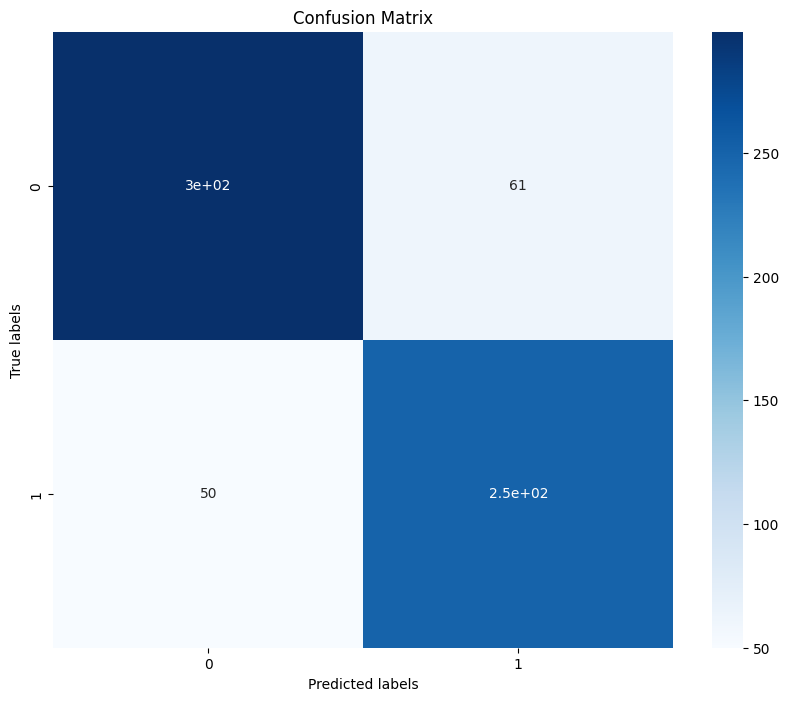

In [ ]:
import numpy as np
import cv2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os # Import the 'os' module

# Set the path to the training and testing folders
train_dir = '/content/drive/MyDrive/Small_skin/train'
test_dir = '/content/drive/MyDrive/Small_skin/test'

# Set the image size
img_size = (28, 28)

# Load the training and testing images
train_images = []
train_labels = []
for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir, folder)):
        img = cv2.imread(os.path.join(train_dir, folder, file))
        img = cv2.resize(img, img_size)
        train_images.append(img)
        train_labels.append(folder)

test_images = []
test_labels = []
for folder in os.listdir(test_dir):
    for file in os.listdir(os.path.join(test_dir, folder)):
        img = cv2.imread(os.path.join(test_dir, folder, file))
        img = cv2.resize(img, img_size)
        test_images.append(img)
        test_labels.append(folder)

# Convert the images to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)

# Reshape the images to 1D arrays
train_images = train_images.reshape(-1, img_size[0]*img_size[1]*3)
test_images = test_images.reshape(-1, img_size[0]*img_size[1]*3)

# Scale the data using StandardScaler
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the Gradient Boosting model
gb.fit(train_images, train_labels)

# Evaluate the Gradient Boosting model on the test data
test_pred = gb.predict(test_images)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(test_labels, test_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(test_labels, test_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(test_labels, test_pred, average='weighted')
print(f'F1 score: {f1:.2f}')

# Calculate specificity
conf_mat = confusion_matrix(test_labels, test_pred)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Generate classification report
print("Classification Report:")
print(classification_report(test_labels, test_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()